# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

### **Data Validation**

This dataset contains 15000 rows and 8 columns with 1074 missing values before cleaning and validation. I have validated all columns against the criteria.

- week: same as description, no cleaning needed.
- sales_method: 3 sales methods needed, cleaned data to ensure all entries are one of    the sales methods and they all follow the same style to avoid inaccuracy in analysis.
-  customer_id: same as description, no cleaning needed.
-  nb_sold: same as description, no cleaning needed.
-  revenue: updated null columns with 0 so there are 15000 entries with numeric values
-  years_as_customer: same as description, no cleaning needed.
-  nb_site_visits: same as description, no cleaning needed.

After the data validation, the dataset contains 15000 rows and 8 columns without missing values.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

product_sales = pd.read_csv('product_sales.csv')

In [23]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [24]:
product_sales['customer_id'].unique

<bound method Series.unique of 0        2e72d641-95ac-497b-bbf8-4861764a7097
1        3998a98d-70f5-44f7-942e-789bb8ad2fe7
2        d1de9884-8059-4065-b10f-86eef57e4a44
3        78aa75a4-ffeb-4817-b1d0-2f030783c5d7
4        10e6d446-10a5-42e5-8210-1b5438f70922
                         ...                 
14995    17267b41-d048-4346-8b90-7f787690a836
14996    09e10d6f-4508-4b27-895e-4db11ce8302b
14997    839653cb-68c9-48cb-a097-0a5a3b2b298b
14998    e4dad70a-b23b-407c-8bd3-e32ea00fae17
14999    4e077235-7c17-4054-9997-7a890336a214
Name: customer_id, Length: 15000, dtype: object>

Checked for entries that did not include 'Email','Call','Email + Call'. I then replaced the values with the correct input so it can be used later for analysis and visualisation.

In [25]:
product_sales[~product_sales['sales_method'].isin(['Email','Call','Email + Call'])]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
22,3,em + call,d72de17a-0d71-401b-b64a-dc4492b2b1ed,10,150.47,20,21,North Carolina
603,1,em + call,622b3c27-c6a3-4796-a89e-010599a21ee8,8,126.02,10,19,Ohio
954,5,em + call,c07b5315-e4aa-4f8c-ad2f-b12ac74dcca0,13,NaN,9,30,California
1260,4,em + call,0829c4e8-a3d4-49b3-947e-b5bde2ec2c0b,12,181.52,22,28,Maryland
1674,5,em + call,b2a5de5e-a76d-4e3f-b31c-cc82f0432cad,12,185.65,3,28,Washington
1693,1,email,39e91aab-35a9-42e7-aa5e-c20da21752ca,10,95.39,1,22,California
2174,3,email,62e90458-5a17-4ef8-bc1c-7a44a154c731,9,92.19,4,26,Indiana
3598,4,em + call,3325c590-486b-4a00-83b5-2f1d1fe6e607,12,176.85,11,34,Minnesota
3601,2,em + call,5c6a43b9-baec-4634-9554-4321f74eb44c,10,152.61,2,23,Pennsylvania
3635,3,em + call,8e445cdf-fd7c-4a3f-bd23-5e474bffd660,10,146.77,1,22,Texas


In [26]:
product_sales['sales_method'] = product_sales['sales_method'].replace('email','Email')

In [27]:
product_sales['sales_method'] = product_sales['sales_method'].replace('em + call','Email + Call')

In [28]:
product_sales[~product_sales['sales_method'].isin(['Email','Call','Email + Call'])]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


I replaced all null values in the revenue columns with 0 to ensure data accuracy for later use.

In [29]:
product_sales['revenue'] = product_sales['revenue'].fillna(0.00)

In [30]:
product_sales

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,0.00,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,0.00,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [31]:
customers_per_method = product_sales.groupby('sales_method',as_index=False)['customer_id'].count()

## **How many customers were there for each approach?**

From the 6 weeks since launch, we can see that there were over 7000 customers contacted by email, just under 5000 customers contacted by call and just over 2500 customers contacted by email + call. We should focus on improving the amount of Emails + calls as there is huge room for improvement.

Text(0.5, 0, 'Sale Method')

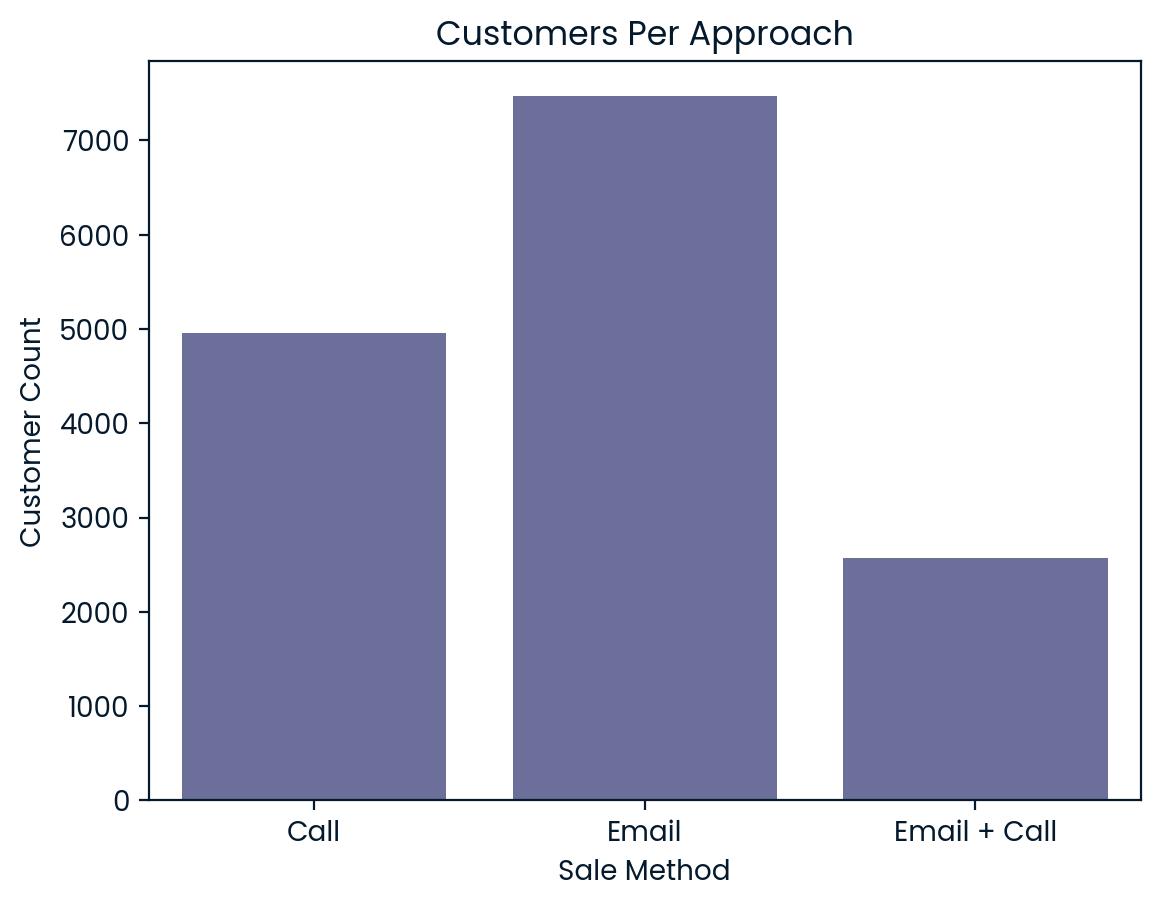

In [32]:
sns.barplot(data=customers_per_method,y='customer_id',x='sales_method')
plt.title('Customers Per Approach')
plt.ylabel('Customer Count')
plt.xlabel('Sale Method')

In [33]:
customers_per_method

,sales_method,customer_id
0,Call,4962
1,Email,7466
2,Email + Call,2572


In [34]:
product_sales['revenue'].mean()

87.20920066666666

## **What does the spread of the revenue look like overall?**

I looked at distribution of revenue across all sales methods. the majority revenue made across all methods is less than £180, we can see the highest amount of revenue is between £25 and £120. This is due to the spread of revenue per sales method. 

Text(0.5, 0, 'Revenue')

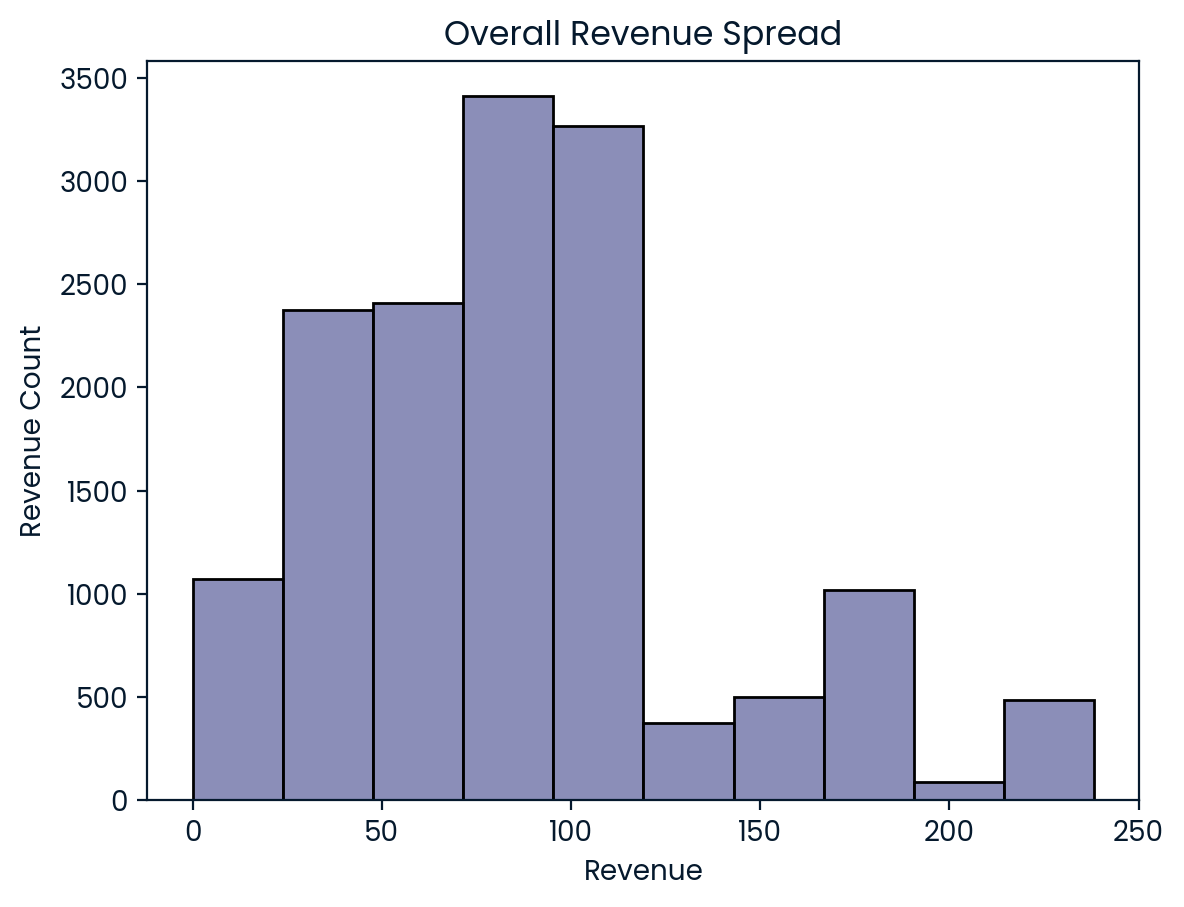

In [35]:
sns.histplot(data=product_sales,x='revenue',bins=10)
plt.title('Overall Revenue Spread')
plt.ylabel('Revenue Count')
plt.xlabel('Revenue')

In [36]:
product_sales.groupby('sales_method')['revenue'].sum()

sales_method
Call            227563.49
Email           672317.83
Email + Call    408256.69
Name: revenue, dtype: float64

From the multiple boxplots we can clearly see the revenue from Email + Call is significantly higher than just a call and higher than just an email. The majority of Email + Call generated between £145 and £180 revenue, generating up to £240 much higher than the overall average.

Emails, also generated revenue over £100 with a few outliers over £130.
Calls don't do nearly as well as most of the revenue is under £50 which is under the overall average. 

Text(0.5, 0, 'Sale Method')

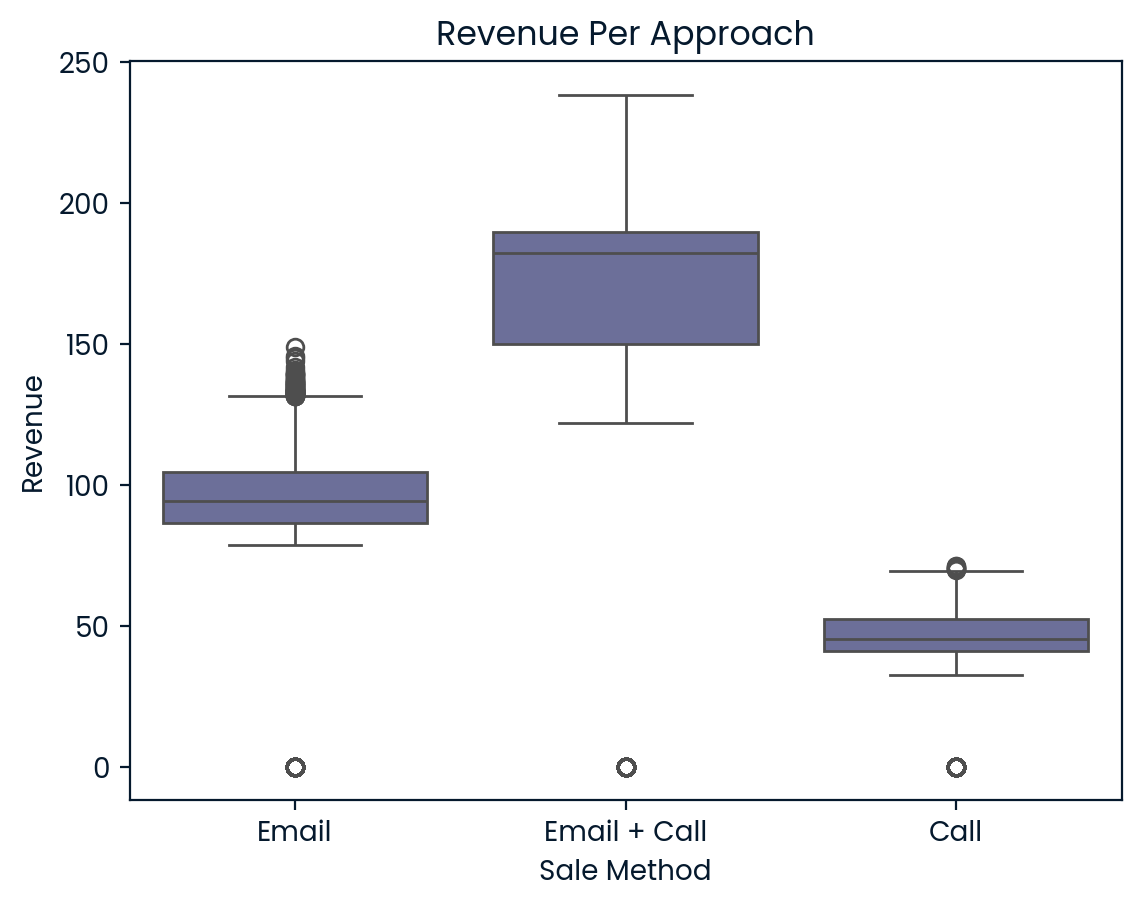

In [37]:
sns.boxplot(data=product_sales,x='sales_method',y='revenue')
plt.title('Revenue Per Approach')
plt.ylabel('Revenue')
plt.xlabel('Sale Method')

## **Was there any difference in revenue over time for each of the methods?**

As we can see from the line graph there a lot of difference in revenue over time for each method. Email + Call saw the biggest rise in revenue from under £120 to over £180, but both Email and Call also saw a slight increase over the weeks. The trend seems to show a slight dip or stagnation after a week of increased revenue with none of the sale methods showing a big increase 2 weeks in a row.


Text(0.5, 29.999999999999986, 'Week')

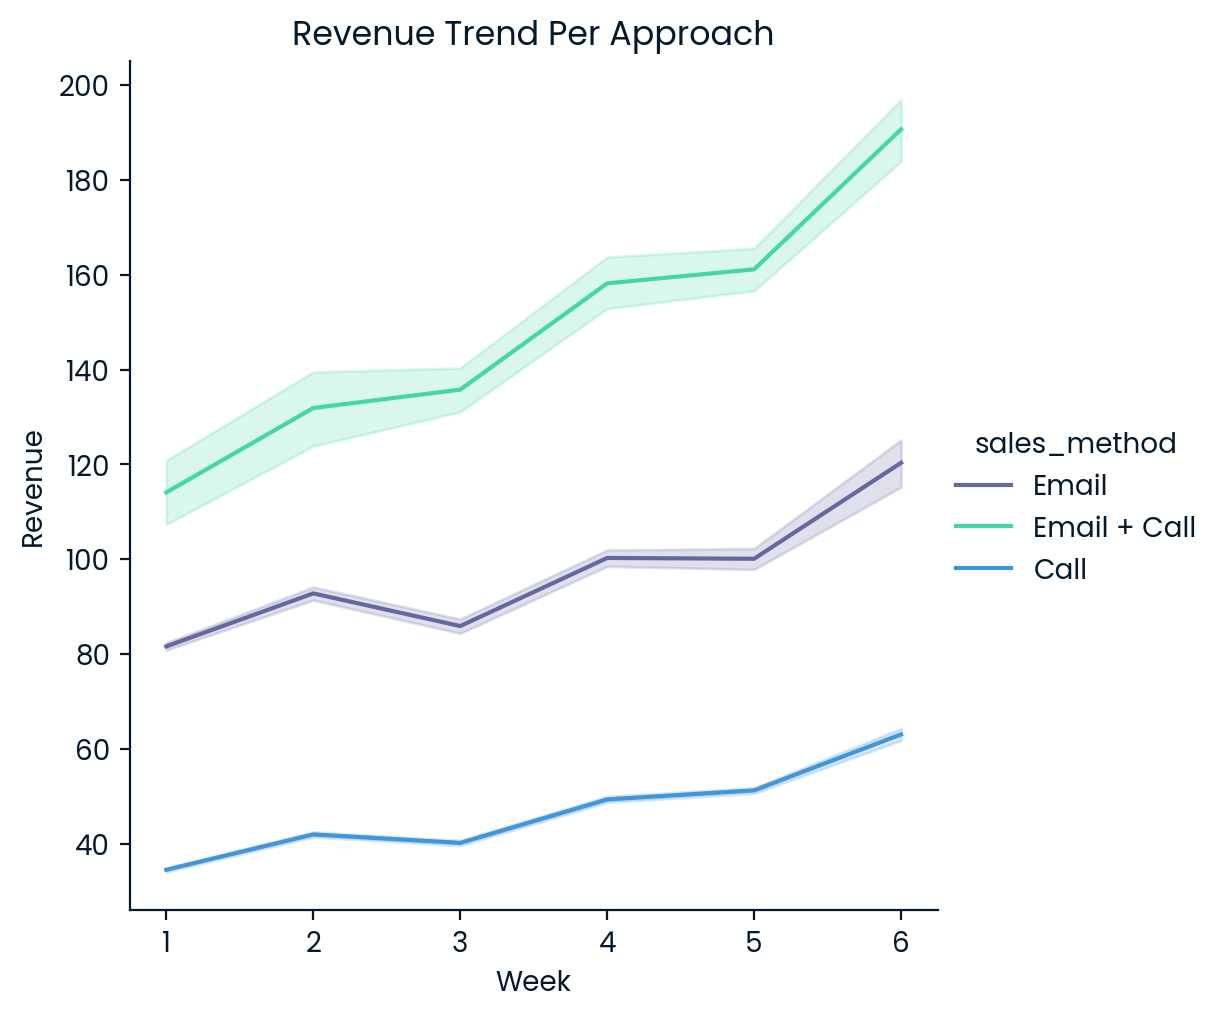

In [38]:
sns.relplot(kind='line',data=product_sales,x='week',y='revenue',hue='sales_method')
plt.title('Revenue Trend Per Approach')
plt.ylabel('Revenue')
plt.xlabel('Week')

There is a slight negative correlation with number of years, but it is so close to zero it implies that the number of years does not impact the amount of revenue made.

In [47]:
correlation = product_sales.groupby('sales_method')['years_as_customer'].corr(product_sales['revenue']).reset_index(name='correlation')
correlation

,sales_method,correlation
0,Call,-0.081835
1,Email,-0.021560
2,Email + Call,-0.027972


From this graph we can see Emails generate the most amount of product sales, this could be due to the number of emails that can be sent out very quickly. Calls coming in second closely followed by Email + Calls. based on this information if we wanted to sell the most number of products quickly, Emails would be the best choice.

Text(0.5, 0, 'Number of Products Sold')

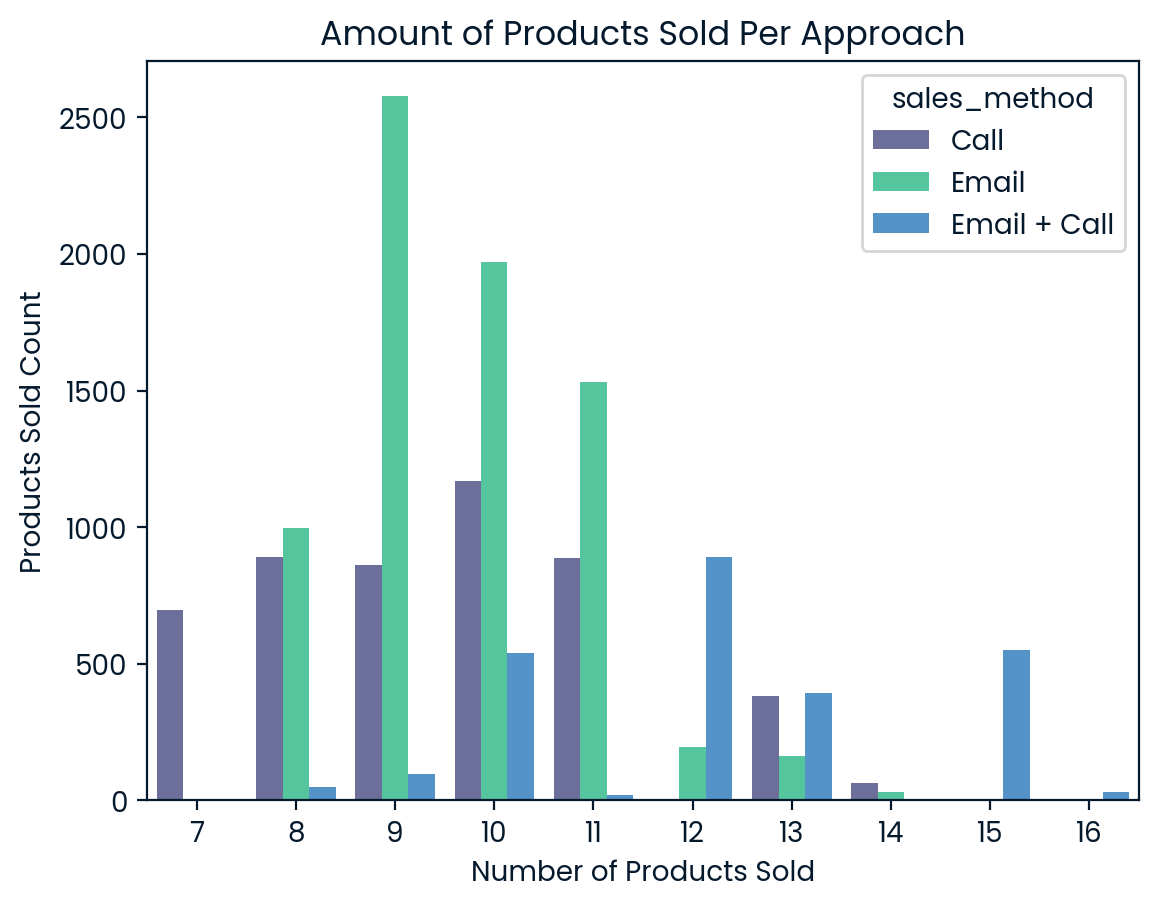

In [40]:
sns.countplot(data=product_sales,x='nb_sold',hue='sales_method')
plt.title('Amount of Products Sold Per Approach')
plt.ylabel('Products Sold Count')
plt.xlabel('Number of Products Sold')

In [41]:
product_sales.groupby('sales_method')['nb_sold'].sum()

sales_method
Call            47187
Email           72639
Email + Call    31444
Name: nb_sold, dtype: int64

## **Business Metrics**

Since the goal is to find the best approach and sees what works and doesn't work, I would recommend using Email + Call if revenue is what's most important, as it clearly brings in the most revenue. But, due to significantly more Emails that can be sent out we should continue with these as they also generate a lot of revenue through more products being sold.

There is an upwards trend for all methods but due to the significant increase in revenue for Email + Call I think we should focus on these.

## **Recommendation**

For the foreseeable future I recommend we focus on these steps:

- We should stop Calls as they are very time consuming and do not generate as much revenue as the other methods
- We should continue to use Email + Call and Email as these have proven to generate a good amount of revenue.
- We should increase the amount of Email + Call as these generate the most revenue and do not take as much time as calls, this can lead to a significant increase in revenue for the company.